In [1]:
import pandas as pd
import numpy as np

# Workflow Description

In [2]:
# Load the data files
file_path_female = 'data/remaining-life-expectancy-at-different-ages-females.csv'
file_path_male = 'data/remaining-life-expectancy-at-different-ages-males.csv'

female_data = pd.read_csv(file_path_female)
male_data = pd.read_csv(file_path_male)

#### Create basic df structure with clear target variable of remaining-life-expectancy-at-different-ages-females and males

In [3]:
# Extracting age columns and reshaping the female data
female_reshaped = female_data.melt(id_vars=['Entity', 'Year', 'Code'],
                                   var_name='Age', value_name='Remaining Life Expectancy')
female_reshaped['Sex'] = 'Female'

# Extracting age columns and reshaping the male data, including 'Code'
male_reshaped = male_data.melt(id_vars=['Entity', 'Year', 'Code'],
                               var_name='Age', value_name='Remaining Life Expectancy')
male_reshaped['Sex'] = 'Male'

# Concatenate the reshaped dataframes with 'Code'
combined_data = pd.concat([female_reshaped, male_reshaped])

# Extract the age from the 'Age' column
combined_data['Age'] = combined_data['Age'].str.extract(r'Age: (\d+)').astype(int)

# Reordering columns for clarity
combined_data = combined_data[['Entity', 'Code', 'Year', 'Sex', 'Age', 'Remaining Life Expectancy']]

combined_data.head()

Entity Code  Year     Sex  Age  Remaining Life Expectancy
0  Afghanistan  AFG  1950  Female    0                    28.3905
1  Afghanistan  AFG  1951  Female    0                    28.6345
2  Afghanistan  AFG  1952  Female    0                    29.1260
3  Afghanistan  AFG  1953  Female    0                    29.6212
4  Afghanistan  AFG  1954  Female    0                    29.9004

Based on an analysis of the available datasets, we have decided to limit the data range to the years 2000 to 2020. This will help us manage the amount of missing data (NaN) more effectively.

In [4]:
# Filtering the data for years between 2000 and 2020, removing rows without a 'Code' variable, and excluding the 'World'
filtered_data = combined_data.dropna(subset=['Code'])
filtered_data = filtered_data[(filtered_data['Year'] >= 2000) & (filtered_data['Year'] <= 2020) & (filtered_data['Entity'] != 'World')]

filtered_data.to_csv('filtered_data-2000_2020.csv', index=False)
filtered_data.head()


Entity Code  Year     Sex  Age  Remaining Life Expectancy
50  Afghanistan  AFG  2000  Female    0                    56.8579
51  Afghanistan  AFG  2001  Female    0                    57.3437
52  Afghanistan  AFG  2002  Female    0                    57.6715
53  Afghanistan  AFG  2003  Female    0                    58.6498
54  Afghanistan  AFG  2004  Female    0                    59.2159

#### Adding more data

In [5]:
# Load the additional data files
file_path_education_expenditure = 'data/total-government-expenditure-on-education-gdp.csv'
file_path_internet_usage = 'data/share-of-individuals-using-the-internet.csv'
file_path_electricity_access = 'data/share-of-the-population-with-access-to-electricity.csv'
file_path_sanitation = 'data/share-using-safely-managed-sanitation.csv'
file_path_smoking = 'data/share-of-adults-who-smoke.csv'
file_path_gdp = 'data/gdp.csv'
file_path_meat_supply = 'data/meat-supply-per-person.csv'
file_path_obesity = 'data/obesity.csv'
file_path_healthcare_spending = 'data/public-healthcare-spending-share-gdp.csv'
file_path_air_pollution = 'data/pm25-air-pollution.csv'
file_path_democracy_index = 'data/DemocracyIndex.csv'

# Reading the data files into DataFrames
education_expenditure_data = pd.read_csv(file_path_education_expenditure)
internet_usage_data = pd.read_csv(file_path_internet_usage)
electricity_access_data = pd.read_csv(file_path_electricity_access)
sanitation_data = pd.read_csv(file_path_sanitation)
smoking_data = pd.read_csv(file_path_smoking)
gdp_data = pd.read_csv(file_path_gdp)
meat_supply_data = pd.read_csv(file_path_meat_supply)
obesity_data = pd.read_csv(file_path_obesity)
healthcare_spending_data = pd.read_csv(file_path_healthcare_spending)
air_pollution_data = pd.read_csv(file_path_air_pollution)

# Reading and selecting specific columns from the Democracy Index file
democracy_index_data = pd.read_csv(file_path_democracy_index)[['Entity', 'Code', 'Year', 'Electoral democracy index']]

# Joining all these dataframes with the filtered_data dataframe based on 'Entity' and 'Year'
# Only join when the year exists in the filtered_data
# Adding custom suffixes to handle duplicate column names
merged_data = filtered_data
for df in [education_expenditure_data, internet_usage_data, electricity_access_data, 
           sanitation_data, smoking_data, gdp_data, meat_supply_data, 
           obesity_data, healthcare_spending_data, air_pollution_data, democracy_index_data]:
    merged_data = merged_data.merge(df, on=['Entity', 'Year'], how='left', suffixes=('', '_extra'))

# Dropping extra columns created due to overlapping column names (if any)
columns_to_drop = [col for col in merged_data.columns if '_extra' in col]
merged_data.drop(columns=columns_to_drop, inplace=True)

merged_data.sample(10)

merged_data.to_csv('merged_data.csv', index=False)



##### checking if data is correctly merged

In [6]:
# Filter the DataFrame for Switzerland and the year 2010
switzerland_data_2010 = merged_data[(merged_data['Entity'] == 'Switzerland') & (merged_data['Year'] == 2010)]

switzerland_data_2010

Entity Code  Year     Sex  Age  Remaining Life Expectancy  \
4315   Switzerland  CHE  2010  Female    0                    84.3602   
9271   Switzerland  CHE  2010  Female   10                    74.7753   
14227  Switzerland  CHE  2010  Female   15                    69.8006   
19183  Switzerland  CHE  2010  Female   25                    59.9133   
24139  Switzerland  CHE  2010  Female   45                    40.3310   
29095  Switzerland  CHE  2010  Female   65                    21.9793   
34051  Switzerland  CHE  2010  Female   80                     9.9016   
39007  Switzerland  CHE  2010    Male    0                    80.0230   
43963  Switzerland  CHE  2010    Male   10                    70.3838   
48919  Switzerland  CHE  2010    Male   15                    65.4156   
53875  Switzerland  CHE  2010    Male   25                    55.6517   
58831  Switzerland  CHE  2010    Male   45                    36.3337   
63787  Switzerland  CHE  2010    Male   65                    18.7386   
68743  Switzerland  CHE  2010    Male   80                     8.1907   

       Gov expenditure on education (%)  Internet usage (% of population)  \
4315                             4.8021                              83.9   
9271                             4.8021                              83.9   
14227                            4.8021                              83.9   
19183                            4.8021                              83.9   
24139                            4.8021                              83.9   
29095                            4.8021                              83.9   
34051                            4.8021                              83.9   
39007                            4.8021                              83.9   
43963                            4.8021                              83.9   
48919                            4.8021                              83.9   
53875                            4.8021                              83.9   
58831                            4.8021                              83.9   
63787                            4.8021                              83.9   
68743                            4.8021                              83.9   

       Access to electricity (% of population)  SanitationAccess  \
4315                                     100.0             98.71   
9271                                     100.0             98.71   
14227                                    100.0             98.71   
19183                                    100.0             98.71   
24139                                    100.0             98.71   
29095                                    100.0             98.71   
34051                                    100.0             98.71   
39007                                    100.0             98.71   
43963                                    100.0             98.71   
48919                                    100.0             98.71   
53875                                    100.0             98.71   
58831                                    100.0             98.71   
63787                                    100.0             98.71   
68743                                    100.0             98.71   

       SmokingRateAdults       GDP ($)  \
4315                26.9  5.174870e+11   
9271                26.9  5.174870e+11   
14227               26.9  5.174870e+11   
19183               26.9  5.174870e+11   
24139               26.9  5.174870e+11   
29095               26.9  5.174870e+11   
34051               26.9  5.174870e+11   
39007               26.9  5.174870e+11   
43963               26.9  5.174870e+11   
48919               26.9  5.174870e+11   
53875               26.9  5.174870e+11   
58831               26.9  5.174870e+11   
63787               26.9  5.174870e+11   
68743               26.9  5.174870e+11   

       Meat consumptionm in kg per year per capita  ObesityRate (BMI > 30)  \
4315                          

In [7]:
print("Basic Information:")
print(merged_data.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69384 entries, 0 to 69383
Data columns (total 17 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Entity                                                       69384 non-null  object 
 1   Code                                                         69384 non-null  object 
 2   Year                                                         69384 non-null  int64  
 3   Sex                                                          69384 non-null  object 
 4   Age                                                          69384 non-null  int32  
 5   Remaining Life Expectancy                                    69384 non-null  float64
 6   Gov expenditure on education (%)                             42014 non-null  float64
 7   Internet usage (% of population)                         

In [8]:
print("\nDescriptive Statistics for Numerical Columns:")
print(merged_data.describe())


Descriptive Statistics for Numerical Columns:
               Year           Age  Remaining Life Expectancy  \
count  69384.000000  69384.000000               69384.000000   
mean    2010.000000     34.285714                  42.454423   
std        6.055344     27.701227                  23.715293   
min     2000.000000      0.000000                   3.186500   
25%     2005.000000     10.000000                  17.870450   
50%     2010.000000     25.000000                  48.133700   
75%     2015.000000     65.000000                  62.483350   
max     2020.000000     80.000000                  88.727200   

       Gov expenditure on education (%)  Internet usage (% of population)  \
count                      42014.000000                      56980.000000   
mean                           4.462028                         33.996421   
std                            1.876947                         30.075464   
min                            0.127174                          0.0

In [9]:
print("\nMissing Values in Each Column:")
missing_values = merged_data.isnull().sum()
print(missing_values)


Missing Values in Each Column:
Entity                                                             0
Code                                                               0
Year                                                               0
Sex                                                                0
Age                                                                0
Remaining Life Expectancy                                          0
Gov expenditure on education (%)                               27370
Internet usage (% of population)                               12404
Access to electricity (% of population)                         7280
SanitationAccess                                               29232
SmokingRateAdults                                              53410
GDP ($)                                                        13328
Meat consumptionm in kg per year per capita                    17682
ObesityRate (BMI > 30)                                         23926
He

In [10]:
print("\nPercentage of Missing Values in Each Column:")
missing_values_percent = (merged_data.isnull().sum() / 69678) * 100
print(missing_values_percent)



Percentage of Missing Values in Each Column:
Entity                                                          0.000000
Code                                                            0.000000
Year                                                            0.000000
Sex                                                             0.000000
Age                                                             0.000000
Remaining Life Expectancy                                       0.000000
Gov expenditure on education (%)                               39.280691
Internet usage (% of population)                               17.801889
Access to electricity (% of population)                        10.448061
SanitationAccess                                               41.952984
SmokingRateAdults                                              76.652602
GDP ($)                                                        19.127989
Meat consumptionm in kg per year per capita                    25.376733
Obesi

In [11]:
# Filter for numeric columns before calculating the correlation matrix
numeric_data = merged_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                                            Year  \
Year                                                1.000000e+00   
Age                                                -1.244713e-13   
Remaining Life Expectancy                           3.909766e-02   
Gov expenditure on education (%)                    4.727994e-03   
Internet usage (% of population)                    5.446421e-01   
Access to electricity (% of population)             1.169574e-01   
SanitationAccess                                    8.885377e-02   
SmokingRateAdults                                  -3.062335e-01   
GDP ($)                                             5.316461e-02   
Meat consumptionm in kg per year per capita         4.960406e-02   
ObesityRate (BMI > 30)                              1.900154e-01   
Healthcare spending (% of GDP)                      8.252165e-02   
air pollution, annual exposure (micrograms per ... -3.238032e-02   
Electoral democracy index  

## Data cleansing (NaN handling)

##### Gov expenditure on education (%) , Final DF: full_data_education_spendings_2000_2020

In [12]:
# Drop rows where 'Code' is NaN
education_expenditure_data = education_expenditure_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = education_expenditure_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = education_expenditure_data['Entity'].unique()
full_years_range = range(education_expenditure_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, education_expenditure_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)


# Filter the data to keep only the years from 2000 to 2020
full_data_education_spendings_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_education_spendings_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_education_spendings_2000_2020.update(group)


# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")

# Display a sample of the final interpolated data
full_data_education_spendings_2000_2020.sample(10)

C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\1877220926.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\1877220926.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\1877220926.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data

United Arab Emirates: 19 NaNs filled with median
Cayman Islands: 18 NaNs filled with median
Suriname: 15 NaNs filled with median
Curacao: 12 NaNs filled with median
Turkmenistan: 12 NaNs filled with median
South Sudan: 11 NaNs filled with median
Uzbekistan: 11 NaNs filled with median
Palestine: 10 NaNs filled with median
East Timor: 8 NaNs filled with median
Liberia: 8 NaNs filled with median
Vietnam: 8 NaNs filled with median
Nauru: 7 NaNs filled with median
Serbia: 7 NaNs filled with median
American Samoa: 6 NaNs filled with median
Bahrain: 6 NaNs filled with median
Grenada: 3 NaNs filled with median
Liechtenstein: 3 NaNs filled with median
Bolivia: 2 NaNs filled with median
San Marino: 2 NaNs filled with median
Sao Tome and Principe: 2 NaNs filled with median
World: 1 NaNs filled with median
Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barb

Entity  Year Code  Gov expenditure on education (%)
17659              Mauritius  2013  MUS                          3.567760
3617                 Bolivia  2014  BOL                          7.478130
22943  Saint Kitts and Nevis  2012  KNA                          3.182906
20971              Palestine  2003  PSE                          4.742110
12832              Indonesia  2018  IDN                          2.754226
6171                Colombia  2001  COL                          3.708680
17814                 Mexico  2017  MEX                          4.518220
7544                 Czechia  2015  CZE                          5.751820
8889             El Salvador  2001  SLV                          3.040760
13877                  Japan  2006  JPN                          3.276680

In [13]:
print("\nMissing Values in Gov expenditure on education:")
missing_values = full_data_education_spendings_2000_2020.isnull().sum()
print(missing_values)


Missing Values in Gov expenditure on education:
Entity                              0
Year                                0
Code                                0
Gov expenditure on education (%)    0
dtype: int64


##### Internet usage (% of population), Final DF: full_data_internet_usage_2000_2020

In [14]:
# Drop rows where 'Code' is NaN
internet_usage_data = internet_usage_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = internet_usage_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = internet_usage_data['Entity'].unique()
full_years_range = range(internet_usage_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, internet_usage_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_internet_usage_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_internet_usage_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_internet_usage_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")

# Display a sample of the final interpolated data
full_data_internet_usage_2000_2020.sample(10)

C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\1748429635.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\1748429635.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\1748429635.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data

Kosovo: 17 NaNs filled with median
Curacao: 16 NaNs filled with median
South Sudan: 13 NaNs filled with median
Montenegro: 4 NaNs filled with median
Serbia: 4 NaNs filled with median
Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
American Samoa: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barbuda: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Aruba: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Belize: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bermuda: 0 NaNs filled with median
Bhutan: 0 NaNs fill

Entity  Year Code  Internet usage (% of population)
1437       Croatia  2001  HRV                         11.558573
2850          Iraq  2019  IRQ                         44.326347
1064        Canada  2000  CAN                         51.300000
5501  South Africa  2004  ZAF                          8.425118
5998       Tunisia  2005  TUN                          9.655086
888         Brunei  2010  BRN                         53.000000
3990    Montenegro  2012  MNE                         56.838783
2969       Jamaica  2014  JAM                         40.402737
1549        Cyprus  2020  CYP                         90.801950
5259        Serbia  2010  SRB                         40.900000

In [15]:
print("\nMissing Values in Gov expenditure on education:")
missing_values = full_data_internet_usage_2000_2020.isnull().sum()
print(missing_values)


Missing Values in Gov expenditure on education:
Entity                              0
Year                                0
Code                                0
Internet usage (% of population)    0
dtype: int64


##### Access to electricity (% of population), Final DF: full_data_electricity_access_2000_2020

In [16]:
# Drop rows where 'Code' is NaN
electricity_access_data = electricity_access_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = electricity_access_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = electricity_access_data['Entity'].unique()
full_years_range = range(electricity_access_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, electricity_access_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_electricity_access_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_electricity_access_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_electricity_access_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")

# Display a sample of the final interpolated data
full_data_electricity_access_2000_2020.sample(10)

C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\743680181.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\743680181.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\743680181.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_wi

North Korea: 9 NaNs filled with median
Liberia: 7 NaNs filled with median
South Sudan: 6 NaNs filled with median
Guinea-Bissau: 2 NaNs filled with median
Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barbuda: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Aruba: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Belize: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bermuda: 0 NaNs filled with median
Bhutan: 0 NaNs filled with median
Bolivia: 0 NaNs filled with median
Bosnia and Herzegovin

Entity  Year Code  \
827   British Virgin Islands  2011  VGB   
4859             Puerto Rico  2013  PRI   
3213                  Kuwait  2010  KWT   
609                    Benin  2010  BEN   
2034                    Fiji  2009  FJI   
1004                Cameroon  2002  CMR   
3145                Kiribati  2004  KIR   
3247              Kyrgyzstan  2013  KGZ   
4264           New Caledonia  2007  NCL   
3361                 Lesotho  2003  LSO   

      Access to electricity (% of population)  
827                                 98.657295  
4859                               100.000000  
3213                               100.000000  
609                                 34.200000  
2034                                87.134865  
1004                                44.040400  
3145                                62.265297  
3247                                98.930000  
4264                               100.000000  
3361                                 5.465813

In [17]:
print("\nMissing Values in Gov expenditure on education:")
missing_values = full_data_electricity_access_2000_2020.isnull().sum()
print(missing_values)


Missing Values in Gov expenditure on education:
Entity                                     0
Year                                       0
Code                                       0
Access to electricity (% of population)    0
dtype: int64


##### SanitationAccess Final DF: full_data_sanitation_2000_2020


In [18]:
# Drop rows where 'Code' is NaN
sanitation_data = sanitation_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = sanitation_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = sanitation_data['Entity'].unique()
full_years_range = range(sanitation_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, sanitation_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_sanitation_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_sanitation_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_sanitation_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")
    
full_data_sanitation_2000_2020.rename(columns={'SanitationAccess': 'Access to Sanitation (% of population)'}, inplace=True)

# Display a sample of the final interpolated data
full_data_sanitation_2000_2020.sample(10)

C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\2830422830.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\2830422830.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\2830422830.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data

Turks and Caicos Islands: 16 NaNs filled with median
Greenland: 14 NaNs filled with median
Channel Islands: 9 NaNs filled with median
Montenegro: 6 NaNs filled with median
Guinea-Bissau: 4 NaNs filled with median
Cambodia: 1 NaNs filled with median
French Guiana: 1 NaNs filled with median
Reunion: 1 NaNs filled with median
Romania: 1 NaNs filled with median
Algeria: 0 NaNs filled with median
American Samoa: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bhutan: 0 NaNs filled with median
Bosnia and Herzegovina: 0 NaNs filled with median
Brazil: 0 NaNs filled with median
Bulgaria: 0 NaNs filled with median
Burkina Faso: 0 

Entity  Year Code  Access to Sanitation (% of population)
1655               Malaysia  2017  MYS                                   82.34
2252  Sao Tome and Principe  2005  STP                                   18.13
2137                  Qatar  2016  QAT                                   94.68
952                 Georgia  2007  GEO                                   36.82
1169                  India  2014  IND                                   34.67
1731                 Monaco  2009  MCO                                  100.00
80                Argentina  2017  ARG                                   46.19
2498                  Spain  2020  ESP                                   89.97
2320                 Serbia  2010  SRB                                   28.26
367            Burkina Faso  2010  BFA                                    6.56

In [19]:
print("\nMissing Values in Access to Sanitation % of population")
missing_values = full_data_sanitation_2000_2020.isnull().sum()
print(missing_values)


Missing Values in Access to Sanitation % of population
Entity                                    0
Year                                      0
Code                                      0
Access to Sanitation (% of population)    0
dtype: int64


##### SmokingRateAdults (Haris)


In [20]:
# Drop rows where 'Code' is NaN
smoking_data = smoking_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = smoking_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = smoking_data['Entity'].unique()
full_years_range = range(smoking_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, smoking_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_smoking_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_smoking_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_smoking_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")
    
full_data_smoking_2000_2020.rename(columns={'SmokingRateAdults': 'Smoking Adults (% of population)'}, inplace=True)

# Display a sample of the final interpolated data
full_data_smoking_2000_2020.sample(50)

C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\2120772844.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\2120772844.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\2120772844.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data

Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Belize: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bolivia: 0 NaNs filled with median
Bosnia and Herzegovina: 0 NaNs filled with median
Botswana: 0 NaNs filled with median
Brazil: 0 NaNs filled with median
Brunei: 0 NaNs filled with median
Bulgaria: 0 NaNs filled with median
Burkina Faso: 0 NaNs filled with median
Burundi: 0 NaNs filled with median
Cambodia: 0 NaNs filled with median
Cameroon: 0 NaNs filled with median
Canada: 0 NaNs filled

Entity  Year Code  \
3321                       Vanuatu  2003  VUT   
448                         Brunei  2007  BRN   
609                           Chad  2000  TCD   
765                  Cote d'Ivoire  2009  CIV   
3348                       Vietnam  2009  VNM   
707                        Comoros  2014  COM   
584                         Canada  2017  CAN   
296                        Belgium  2002  BEL   
303                        Belgium  2009  BEL   
2003                    Mauritania  2008  MRT   
1872                        Malawi  2003  MWI   
2105                    Montenegro  2005  MNE   
253                       Barbados  2001  BRB   
2074                       Moldova  2016  MDA   
1881                        Malawi  2012  MWI   
733                          Congo  2019  COG   
1607                    Kazakhstan  2011  KAZ   
595                     Cape Verde  2007  CPV   
1592                        Jordan  2017  JOR   
1724                        Latvia  2002  LVA   
2569                      Portugal  2007  PRT   
205                        Bahamas  2016  BHS   
1181                       Georgia  2005  GEO   
1409                     Indonesia  2002  IDN   
2826                     Singapore  2012  SGP   
1650                      Kiribati  2012  KIR   
2897               Solomon Islands  2020  SLB   
662                          China  2011  CHN   
1889                        Malawi  2020  MWI   
17                     Afghanistan  2017  AFG   
2855                      Slovakia  2020  SVK   
894                        Denmark  2012  DNK   
1413                     Indonesia  2006  IDN   
1116                       Finland  2003  FIN   
864   Democratic Republic of Congo  2003  COD   
1458                          Iraq  2009  IRQ   
878   Democratic Republic of Congo  2017  COD   
736                     Costa Rica  2001  CRI   
743                     Costa Rica  2008  CRI   
101                      Argentina  2017  ARG   
999                    El Salvador  2012  SLV   
3085                          Togo  2019  TGO   
2191                       Namibia  2007  NAM   
1521                         Italy  2009  ITA   
1884                        Malawi  2015  MWI   
1292                 Guinea-Bissau  2011  GNB   
1591                        Jordan  2016  JOR   
77                         Andorra  2014  AND   
1513                         Italy  2001  ITA   
2466              Papua New Guinea  2009  PNG   

      Smoking Adults (% of population)  
3321                         24.220000  
448                          16.460000  
609                          13.900000  
765                          13.720000  
3348                         27.260000  
707                          24.340000  
584                          14.333333  
296                          32.240000  
303                          28.500000  
2003                         16.220000  
1872                         21.340000  
2105                         36.700000  
253                          10.100000  
2074                         28.166667  
1881                         14.840000  
733                          14.300000  
1607                         27.560000  
595                          16.760000  
1592                         34.300000  
1724                         43.040000  
2569                         25.300000  
205                          10.633333  
1181                         32.600000  
1409                         35.560000  
2826                         16.500000  
1650                         50.180000  
2897                         36.500000  
662                          26.140000  
1889                         10.800000  
17                           24.533333  
2855                         31.500000  
894                          23.740000  
1413                         35.900000  
1116                         33.120000  
864                          17.660000  
1458                         20.040000  
878        

In [21]:
print("\nMissing Values in Access to Smoking Adults (% of population)")
missing_values = full_data_smoking_2000_2020.isnull().sum()
print(missing_values)


Missing Values in Access to Smoking Adults (% of population)
Entity                              0
Year                                0
Code                                0
Smoking Adults (% of population)    0
dtype: int64


##### GDP ($) (Haris)

In [22]:
# Drop rows where 'Code' is NaN
gdp_data = gdp_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = gdp_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = gdp_data['Entity'].unique()
full_years_range = range(gdp_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, gdp_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_gdp_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_gdp_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_gdp_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")
    

# Display a sample of the final interpolated data
full_data_gdp_2000_2020.sample(50)

C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\4280582203.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\4280582203.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\4280582203.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data

Djibouti: 13 NaNs filled with median
Somalia: 13 NaNs filled with median
Turks and Caicos Islands: 11 NaNs filled with median
Sint Maarten (Dutch part): 9 NaNs filled with median
Kosovo: 8 NaNs filled with median
Cayman Islands: 6 NaNs filled with median
Nauru: 4 NaNs filled with median
Afghanistan: 2 NaNs filled with median
Sao Tome and Principe: 1 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barbuda: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Aruba: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Belize: 0 NaNs filled with median
Benin: 0 N

Entity  Year      Code       GDP ($)
4020                   North Macedonia  2011       MKD  2.842835e+10
5969                             World  2007  OWID_WRL  9.020863e+13
2726                             Japan  2019       JPN  5.280269e+12
2813                             Kenya  2013       KEN  1.769693e+11
246                              Aruba  2019       ABW  4.340760e+09
1109                              Chad  2014       TCD  2.549984e+10
2229                            Guinea  2018       GIN  3.103210e+10
4694                        San Marino  2003       SMR  2.239084e+09
478                            Belarus  2003       BLR  9.463849e+10
5543                           Tunisia  2015       TUN  1.242402e+11
3427                  Marshall Islands  2007       MHL  1.993859e+08
1871                              Fiji  2001       FJI  7.921450e+09
5757              United Arab Emirates  2012       ARE  5.194584e+11
4581             Saint Kitts and Nevis  2014       KNA  1.339043e+09
695             Bosnia and Herzegovina  2003       BIH  3.187841e+10
2652                             Italy  2007       ITA  2.650560e+12
2352                          Honduras  2017       HND  5.244414e+10
2037                           Georgia  2012       GEO  4.212044e+10
2471                             India  2012       IND  5.801290e+12
1716                       El Salvador  2001       SLV  3.906751e+10
1385                           Curacao  2011       CUW  4.118497e+09
3178                        Luxembourg  2006       LUX  5.357153e+10
2250                     Guinea-Bissau  2008       GNB  2.460204e+09
3121                             Libya  2011       LBY  1.012153e+11
5915                           Vanuatu  2015       VUT  7.904329e+08
6010                            Zambia  2017       ZMB  5.873519e+10
3810                             Nauru  2018       NRU  1.455914e+08
3578                           Moldova  2003       MDA  1.808919e+10
5807                     United States  2000       USA  1.415771e+13
2003                            Gambia  2009       GMB  3.973376e+09
5254                          Suriname  2005       SUR  7.945658e+09
2403                           Hungary  2006       HUN  2.559895e+11
3680                           Morocco  2012       MAR  2.082301e+11
2847                          Kiribati  2016       KIR  2.367680e+08
1314                     Cote d'Ivoire  2002       CIV  6.480298e+10
2156                           Grenada  2007       GRD  1.519134e+09
4010                   North Macedonia  2001       MKD  2.008694e+10
2035                           Georgia  2010       GEO  3.687003e+10
2381                         Hong Kong  2015       HKG  4.171695e+11
886                            Burundi  2008       BDI  6.726727e+09
4853                        Seychelles  2007       SYC  1.866814e+09
973                             Canada  2002       CAN  1.330182e+12
5628          Turks and Caicos Islands  2007       TCA  9.115807e+08
1548                          Djibouti  2019       DJI  5.120925e+09
2871                            Kosovo  2009  OWID_KOS  1.290709e+10
4489                           Romania  2015       ROU  4.743355e+11
4568             Saint Kitts and Nevis  2001       KNA  9.399009e+08
1827                          Eswatini  2019       SWZ  9.943192e+09
3583                           Moldova  2008       MDA  2.430240e+10
4639  Saint Vincent and the Grenadines  2010       VCT  1.268672e+09

In [23]:
print("\nMissing Values in GDP ($)")
missing_values = full_data_gdp_2000_2020.isnull().sum()
print(missing_values)


Missing Values in GDP ($)
Entity     0
Year       0
Code       0
GDP ($)    0
dtype: int64


##### Meat consumption in kg per year per capita (Haris)

In [24]:
# Drop rows where 'Code' is NaN
meat_supply_data = meat_supply_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = meat_supply_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = meat_supply_data['Entity'].unique()
full_years_range = range(meat_supply_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, meat_supply_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_meat_supply_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_meat_supply_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_meat_supply_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")
    

# Display a sample of the final interpolated data
full_data_meat_supply_2000_2020.sample(50)

C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\2098549107.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\2098549107.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\2098549107.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data

Bahrain: 19 NaNs filled with median
Bhutan: 19 NaNs filled with median
Micronesia (country): 19 NaNs filled with median
Nauru: 19 NaNs filled with median
Qatar: 19 NaNs filled with median
South Sudan: 19 NaNs filled with median
Burundi: 14 NaNs filled with median
Sudan: 12 NaNs filled with median
Comoros: 10 NaNs filled with median
Democratic Republic of Congo: 10 NaNs filled with median
Libya: 10 NaNs filled with median
Papua New Guinea: 10 NaNs filled with median
Seychelles: 10 NaNs filled with median
Syria: 10 NaNs filled with median
Montenegro: 6 NaNs filled with median
Serbia: 6 NaNs filled with median
Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barbuda: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 Na

Entity  Year      Code  \
6160                  Macao  2001       MAC   
4721                Iceland  2002       ISL   
3712                 France  2013       FRA   
772              Bangladesh  2013       BGD   
5323                 Jordan  2004       JOR   
10974        United Kingdom  2015       GBR   
10913  United Arab Emirates  2014       ARE   
4074                  Ghana  2015       GHA   
1554               Bulgaria  2015       BGR   
10615                Turkey  2016       TUR   
6358               Malaysia  2019       MYS   
8214               Paraguay  2015       PRY   
2626                 Cyprus  2007       CYP   
7797            North Korea  2018       PRK   
2868                Denmark  2009       DNK   
6586             Mauritania  2007       MRT   
2741         Czechoslovakia  2002  OWID_CZS   
6110             Luxembourg  2011       LUX   
6823                Moldova  2004       MDA   
10784                Uganda  2005       UGA   
9402               Slovakia  2003       SVK   
8332            Philippines  2013       PHL   
830                Barbados  2011       BRB   
2998               Dominica  2019       DMA   
2504                Croatia  2005       HRV   
7497          New Caledonia  2018       NCL   
6178                  Macao  2019       MAC   
11505            Yugoslavia  2006  OWID_YGS   
531                 Austria  2012       AUT   
8636                 Russia  2017       RUS   
10854               Ukraine  2015       UKR   
11327               Vietnam  2008       VNM   
6279                 Malawi  2000       MWI   
10917  United Arab Emirates  2018       ARE   
7004                Morocco  2005       MAR   
2744         Czechoslovakia  2005  OWID_CZS   
9887                  Sudan  2008       SDN   
10603                Turkey  2004       TUR   
10432                  Togo  2013       TGO   
11215               Vanuatu  2016       VUT   
1193                 Bhutan  2014       BTN   
6839                Moldova  2020       MDA   
1674                Burundi  2015       BDI   
10257            Tajikistan  2018       TJK   
3898                 Gambia  2019       GMB   
10614                Turkey  2015       TUR   
4376          Guinea-Bissau  2017       GNB   
10672          Turkmenistan  2013       TKM   
5384             Kazakhstan  2005       KAZ   
5278                  Japan  2019       JPN   

       Meat consumptionm in kg per year per capita  
6160                                     79.694580  
4721                                     84.424965  
3712                                     87.582090  
772                                       4.066217  
5323                                     38.122630  
10974                                    79.658806  
10913                                    37.394947  
4074                                     12.617006  
1554                                     54.808323  
10615                                    36.919000  
6358                                     59.479687  
8214                                     30.900856  
2626                                     81.585340  
7797                                     13.682792  
2868                                     66.370510  
6586                                     29.841520  
2741                                     84.544910  
6110                                     87.784540  
6823                                     27.525291  
10784                                    12.950956  
9402                                     65.122550  
8332                                     34.015102  
830                                      67.026070  
2998                                     67.652920  
2504                                     49.293040  
7497                                     73.172870  
6178                                     92.845276  
11505                                    61.237305  
531                                      87.222336  
8636                             

In [25]:
print("\nMissing Values in Meat consumption in kg per year per capita")
missing_values = full_data_meat_supply_2000_2020.isnull().sum()
print(missing_values)


Missing Values in Meat consumption in kg per year per capita
Entity                                         0
Year                                           0
Code                                           0
Meat consumptionm in kg per year per capita    0
dtype: int64


##### ObesityRate (BMI > 30) (Edi)

In [26]:
# Drop rows where 'Code' is NaN
obesity_data = obesity_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = obesity_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = obesity_data['Entity'].unique()
full_years_range = range(obesity_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, obesity_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_obesity_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_obesity_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_obesity_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")

# Display a sample of the final interpolated data
full_data_obesity_2000_2020.sample(50)


C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\1749411560.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\1749411560.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\1749411560.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data

Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barbuda: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Belize: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bhutan: 0 NaNs filled with median
Bolivia: 0 NaNs filled with median
Bosnia and Herzegovina: 0 NaNs filled with median
Botswana: 0 NaNs filled with median
Brazil: 0 NaNs filled with median
Brunei: 0 NaNs filled with median
Bulgaria: 0 NaNs filled with median
Burkina Faso: 0 NaNs filled with median
Burundi: 0 Na

Entity  Year Code  ObesityRate (BMI > 30)
6515               Romania  2004  ROU                    18.3
2286              Dominica  2007  DMA                    22.5
5744                 Niger  2015  NER                     4.5
8491            Uzbekistan  2002  UZB                     8.9
7067          Sierra Leone  2004  SLE                     4.4
5598           Netherlands  2007  NLD                    18.2
3951               Jamaica  2016  JAM                    24.4
72                 Albania  2001  ALB                    13.3
1468            Cape Verde  2017  CPV                    10.6
6052              Pakistan  2001  PAK                     3.6
2796                  Fiji  2011  FJI                    26.5
4042                Jordan  2015  JOR                    32.5
1961               Croatia  2004  HRV                    20.9
5143  Micronesia (country)  2012  FSM                    38.6
3660             Indonesia  2001  IDN                     2.6
3616                 India  2003  IND                     1.8
2979                Gambia  2010  GMB                     6.7
4682            Madagascar  2011  MDG                     3.4
8597             Venezuela  2016  VEN                    25.2
3437                 Haiti  2008  HTI                    14.1
6023                  Oman  2018  OMN                    22.9
8220                Uganda  2007  UGA                     2.6
2340    Dominican Republic  2015  DOM                    26.0
5551                 Nepal  2006  NPL                     2.1
4492               Liberia  2005  LBR                     5.5
3908                 Italy  2019  ITA                    22.9
3708                  Iran  2003  IRN                    15.8
7533                 Sudan  2010  SDN                     5.6
5426               Myanmar  2019  MMR                     5.7
8721                 Yemen  2002  YEM                     8.0
2740              Ethiopia  2001  ETH                     1.7
730                Belarus  2015  BLR                    26.1
1792                 Congo  2019  COG                     8.4
4274            Kyrgyzstan  2017  KGZ                    15.4
3069               Germany  2008  DEU                    21.9
7678           Switzerland  2017  CHE                    21.2
1419                Canada  2014  CAN                    30.1
3431                 Haiti  2002  HTI                    10.4
3246             Guatemala  2001  GTM                    11.7
2252              Djibouti  2019  DJI                    12.2
947                Bolivia  2002  BOL                    12.6
729                Belarus  2014  BLR                    25.6
1788                 Congo  2015  COG                     8.0
1645                 China  2010  CHN                     4.5
5281            Montenegro  2012  MNE                    23.1
40             Afghanistan  2015  AFG                     4.3
7764            Tajikistan  2011  TJK                    10.0
1230          Burkina Faso  2009  BFA                     3.0
86                 Albania  2015  ALB                    21.7
3021               Georgia  2006  GEO                    16.9

##### Healthcare spending (% of GDP) (Edi)

In [27]:
# Drop rows where 'Code' is NaN
healthcare_spending_data = healthcare_spending_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = healthcare_spending_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = healthcare_spending_data['Entity'].unique()
full_years_range = range(healthcare_spending_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and the full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, healthcare_spending_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_public_healthcare_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with the median for each country and counting filled NaNs
nan_filled_count = {}
for entity, group in full_data_public_healthcare_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_public_healthcare_2000_2020.update(group)

# Sort the dictionary by the count of filled NaNs in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of filled NaNs for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")

# Display a sample of the final interpolated data
full_data_public_healthcare_2000_2020.sample(50)


C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\1214575476.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\1214575476.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\1214575476.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data

South Sudan: 17 NaNs filled with median
Montenegro: 11 NaNs filled with median
Zimbabwe: 10 NaNs filled with median
East Timor: 3 NaNs filled with median
Iraq: 3 NaNs filled with median
Afghanistan: 2 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barbuda: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Belize: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bhutan: 0 NaNs filled with median
Bolivia: 0 NaNs filled with median
Bosnia and Herzegovina: 0 NaNs filled with median
Botswan

Entity  Year      Code  Healthcare spending (% of GDP)
2590               Nicaragua  2007       NIC                        3.153068
3257                Slovenia  2002       SVN                        5.809693
2542             Netherlands  2001       NLD                        5.611759
456   Bosnia and Herzegovina  2015       BIH                        6.473052
1755                   Italy  2012       ITA                        6.664661
3507              Tajikistan  2000       TJK                        0.885446
3492                   Syria  2006       SYR                        1.774285
974                  Denmark  2008       DNK                        7.991418
2938                 Romania  2019       ROU                        4.603614
1203                Eswatini  2006       SWZ                        3.459488
3139                 Senegal  2010       SEN                        1.161644
1608                 Iceland  2012       ISL                        6.538462
1263                 Finland  2003       FIN                        6.137266
3195            Sierra Leone  2003       SLE                        2.200227
1199                Eswatini  2002       SWZ                        2.422583
854            Cote d'Ivoire  2014       CIV                        0.777609
1293                  France  2012       FRA                        7.941052
3392               Sri Lanka  2011       LKA                        1.581285
1337                  Gambia  2014       GMB                        1.092287
3888               Venezuela  2003       VEN                        3.781096
3939                   World  2012  OWID_WRL                        5.674045
2694                    Oman  2006       OMN                        1.864659
3731                  Uganda  2014       UGA                        0.950771
2705                    Oman  2017       OMN                        3.463041
1563                Honduras  2009       HND                        3.967303
3234                Slovakia  2000       SVK                        4.639136
3489                   Syria  2003       SYR                        2.452808
2157                Malaysia  2015       MYS                        2.033614
2774        Papua New Guinea  2002       PNG                        1.764457
901                     Cuba  2019       CUB                       10.125061
3570                    Togo  2000       TGO                        0.290968
3337             South Korea  2019       KOR                        4.860005
1923              Kyrgyzstan  2012       KGZ                        4.221006
1715                 Ireland  2014       IRL                        6.770293
3299            South Africa  2002       ZAF                        2.577340
852            Cote d'Ivoire  2012       CIV                        0.746079
223               Azerbaijan  2013       AZE                        1.063072
2901                   Qatar  2003       QAT                        2.627677
2117              Madagascar  2017       MDG                        2.246151
3355             South Sudan  2016       SSD                        0.840192
2703                    Oman  2015       OMN                        3.848818
2520                   Nepal  2000       NPL                        0.484851
172                Australia  2004       AUS                        5.813457
1052              East Timor  2002       TLS                        3.473817
3530                Tanzania  2002       TZA                        1.332134
3979                  Zambia  2010       ZMB                        0.841367
1395                   Ghana  2009       GHA                        2.182130
1472                  Guinea  2002       GIN                        0.640118
1509           Guinea-Bissau  2018       GNB                        0.553500
2219                   Malta  2014       MLT                        5.597742

##### Air pollution, annual exposure (micrograms per cubic meter) (Edi)

In [28]:
# Drop rows where 'Code' is NaN
air_pollution_data = air_pollution_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = air_pollution_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = air_pollution_data['Entity'].unique()
full_years_range = range(air_pollution_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and the full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, air_pollution_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_pm25_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with the median for each country and counting filled NaNs
nan_filled_count = {}
for entity, group in full_data_pm25_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_pm25_2000_2020.update(group)

# Sort the dictionary by the count of filled NaNs in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of filled NaNs for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")

# Display a sample of the final interpolated data
full_data_pm25_2000_2020.sample(50)


C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\3461456481.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\3461456481.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\3461456481.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data

Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
American Samoa: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barbuda: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Belize: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bermuda: 0 NaNs filled with median
Bhutan: 0 NaNs filled with median
Bolivia: 0 NaNs filled with median
Bosnia and Herzegovina: 0 NaNs filled with median
Botswana: 0 NaNs filled with median
Brazil: 0 NaNs filled with median
Brunei: 0 NaNs filled with median
Bulgaria: 0 

Entity  Year Code  \
4830                  Sierra Leone  2015  SLE   
5282                         Syria  2002  SYR   
4803                    Seychelles  2019  SYC   
4167                     Palestine  2003  PSE   
4939               Solomon Islands  2000  SLB   
5187                      Suriname  2000  SUR   
600                          Benin  2001  BEN   
1934                       Finland  2002  FIN   
2774                         Japan  2005  JPN   
1822                       Estonia  2014  EST   
3951                       Nigeria  2004  NGA   
825                         Brunei  2009  BRN   
2896                      Kiribati  2003  KIR   
2496                       Iceland  2006  ISL   
3533                        Mexico  2020  MEX   
5514                       Tunisia  2017  TUN   
2159                        Greece  2010  GRC   
677                         Bhutan  2016  BTN   
3362                          Mali  2004  MLI   
4485                       Romania  2011  ROU   
1019                        Canada  2017  CAN   
5625                       Ukraine  2004  UKR   
1731                   El Salvador  2016  SLV   
4150                      Pakistan  2017  PAK   
1169                         China  2012  CHN   
1072      Central African Republic  2008  CAF   
3960                       Nigeria  2013  NGA   
3307                      Malaysia  2011  MYS   
5694                United Kingdom  2011  GBR   
5756  United States Virgin Islands  2011  VIR   
6027                      Zimbabwe  2003  ZWE   
1779                       Eritrea  2002  ERI   
3530                        Mexico  2017  MEX   
1907                          Fiji  2006  FJI   
460                     Bangladesh  2016  BGD   
3483                     Mauritius  2001  MUS   
2572                     Indonesia  2020  IDN   
3306                      Malaysia  2010  MYS   
151                        Andorra  2017  AND   
5906                       Vietnam  2006  VNM   
3172                     Lithuania  2000  LTU   
1485  Democratic Republic of Congo  2018  COD   
3990                   North Korea  2012  PRK   
3330                      Maldives  2003  MDV   
73                         Algeria  2001  DZA   
1263                         Congo  2013  COG   
2871                         Kenya  2009  KEN   
2031                        Gambia  2006  GMB   
2242                          Guam  2000  GUM   
2719                         Italy  2012  ITA   

      air pollution, annual exposure (micrograms per cubic meter)  
4830                                          22.528599            
5282                                          40.910483            
4803                                          20.178650            
4167                                          32.726198            
4939                                          13.866955            
5187                                          29.025892            
600                                           38.686798            
1934                                           7.113309            
2774                                          14.348666            
1822                                           7.705553            
3951                                          61.237378            
825                                            7.382482            
2896                                          13.416139            
2496                                           7.845665            
3533                                          20.921116            
5514                                          37.655994            
2159                                          19.061089            
677                                           37.224365            
3362                                          38.235275            
4485                                          17.636755            
1019                                           6.428383            
5625                            

##### Electoral democracy index (Edi)

In [29]:
# Drop rows where 'Code' is NaN
democracy_index_data = democracy_index_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = democracy_index_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = democracy_index_data['Entity'].unique()
full_years_range = range(democracy_index_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, democracy_index_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_democracy_index_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_democracy_index_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_democracy_index_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")

# Display a sample of the final interpolated data
full_data_democracy_index_2000_2020.sample(50)


C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\3295792721.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\3295792721.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\Haris\AppData\Local\Temp\ipykernel_4796\3295792721.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_data = merged_data

Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Baden: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Bavaria: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bhutan: 0 NaNs filled with median
Bolivia: 0 NaNs filled with median
Bosnia and Herzegovina: 0 NaNs filled with median
Botswana: 0 NaNs filled with median
Brazil: 0 NaNs filled with median
Bulgaria: 0 NaNs filled with median
Burkina Faso: 0 NaNs filled with median
Burundi: 0 NaNs filled with median
Cambodia: 0 NaNs filled with median
Cameroon: 0 NaNs filled with median
Canada: 0 NaNs filled w

Entity  Year      Code  Electoral democracy index
3933                  Benin  2010       BEN                      0.657
30852              Paraguay  2017       PRY                      0.594
9267                   Cuba  2008       CUB                      0.104
20402            Kazakhstan  2007       KAZ                      0.243
36635           South Korea  2000       KOR                      0.842
1619              Australia  2016       AUS                      0.883
4864               Botswana  2013       BWA                      0.720
44761              Zanzibar  2006  OWID_ZAN                      0.291
40581          Turkmenistan  2002       TKM                      0.070
12060     Equatorial Guinea  2017       GNQ                      0.176
8099                Comoros  2000       COM                      0.227
16219                 Haiti  2000       HTI                      0.434
1621              Australia  2018       AUS                      0.874
4167                 Bhutan  2012       BTN                      0.601
25038             Mauritius  2003       MUS                      0.755
18791                  Iraq  2020       IRQ                      0.362
11592                 Egypt  2013       EGY                      0.186
29221       North Macedonia  2010       MKD                      0.522
16464               Hanover  2013  OWID_HAN                      0.132
42218         United States  2015       USA                      0.901
19253                Israel  2018       ISR                      0.703
19473                 Italy  2006       ITA                      0.858
36423          South Africa  2020       ZAF                      0.696
28069           New Zealand  2018       NZL                      0.896
37565                 Sudan  2002       SDN                      0.177
30840              Paraguay  2005       PRY                      0.603
1157              Argentina  2018       ARG                      0.767
34552            Seychelles  2005       SYC                      0.439
10431              Djibouti  2012       DJI                      0.250
27361               Namibia  2006       NAM                      0.671
41749  United Arab Emirates  2010       ARE                      0.070
24819            Mauritania  2016       MRT                      0.437
18789                  Iraq  2018       IRQ                      0.399
27821           Netherlands  2002       NLD                      0.852
18547                  Iran  2008       IRN                      0.177
7642                  China  2007       CHN                      0.095
28767               Nigeria  2020       NGA                      0.529
38735                Taiwan  2012       TWN                      0.811
9272                   Cuba  2013       CUB                      0.168
25746                Modena  2015  OWID_MOD                      0.038
11583                 Egypt  2004       EGY                      0.206
8583             Costa Rica  2020       CRI                      0.899
18322             Indonesia  2015       IDN                      0.655
42451               Uruguay  2016       URY                      0.893
4168                 Bhutan  2013       BTN                      0.578
9275                   Cuba  2016       CUB                      0.169
17386             Hong Kong  2007       HKG                      0.371
4388                Bolivia  2001       BOL                      0.748
18327             Indonesia  2020       IDN                      0.594
40828               Tuscany  2017  OWID_TUS                      0.127

### merge Final Dataframe (sven)

In [30]:
# Load base data (filtered_data from 2000 to 2020)
final_df = pd.read_csv('filtered_data-2000_2020.csv')


# Assuming all full_data_* dataframes are already loaded in your environment
dataframes_to_merge = [
    full_data_education_spendings_2000_2020,
    full_data_internet_usage_2000_2020,
    full_data_electricity_access_2000_2020,
    full_data_sanitation_2000_2020,
    full_data_smoking_2000_2020,
    full_data_gdp_2000_2020,
    full_data_meat_supply_2000_2020,
    full_data_obesity_2000_2020,
    full_data_public_healthcare_2000_2020,
    full_data_pm25_2000_2020,
    full_data_democracy_index_2000_2020
]

# Count NaNs for debugging
nan_count_before = final_df.isnull().sum().sum()
for df in dataframes_to_merge:
    nan_count_before += df.isnull().sum().sum()

# Merge each dataframe with base_data
for df in dataframes_to_merge:
    final_df = final_df.merge(df, on=['Entity', 'Year'], how='left', suffixes=('', '_extra'))

# Drop columns that were created due to overlapping names and are not needed
columns_to_drop = [col for col in final_df.columns if '_extra' in col]
final_df.drop(columns=columns_to_drop, inplace=True)

# Drop NAN for missing coutntry
final_df.dropna(inplace=True)

# Count NaNs after merging for debugging
nan_count_after = final_df.isnull().sum().sum()

# Save the final merged dataframe
final_df.to_csv('final_merged_data.csv', index=False)

# Debugging Information
print(f"Total NaNs in all dataframes before merging: {nan_count_before}")
print(f"Total NaNs in base_data after merging: {nan_count_after}")
final_df

Total NaNs in all dataframes before merging: 0
Total NaNs in base_data after merging: 0


Entity Code  Year     Sex  Age  Remaining Life Expectancy  \
42      Algeria  DZA  2000  Female    0                    71.9487   
43      Algeria  DZA  2001  Female    0                    72.1968   
44      Algeria  DZA  2002  Female    0                    72.5595   
45      Algeria  DZA  2003  Female    0                    72.2499   
46      Algeria  DZA  2004  Female    0                    72.8122   
...         ...  ...   ...     ...  ...                        ...   
69379  Zimbabwe  ZWE  2016    Male   80                     6.0570   
69380  Zimbabwe  ZWE  2017    Male   80                     6.0671   
69381  Zimbabwe  ZWE  2018    Male   80                     6.0785   
69382  Zimbabwe  ZWE  2019    Male   80                     6.0872   
69383  Zimbabwe  ZWE  2020    Male   80                     5.6391   

       Gov expenditure on education (%)  Internet usage (% of population)  \
42                             4.982849                          0.491706   
43                             4.902120                          0.646114   
44                             4.821391                          1.591641   
45                             4.740663                          2.195360   
46                             4.659934                          4.634475   
...                                 ...                               ...   
69379                          5.925303                         23.119990   
69380                          5.818780                         24.400000   
69381                          2.050490                         25.000000   
69382                          2.050490                         25.100000   
69383                          2.050490                         29.298567   

       Access to electricity (% of population)  \
42                                   98.973100   
43                                   98.966870   
44                                   98.953060   
45                                   98.934010   
46                                   98.912080   
...                                        ...   
69379                                42.561730   
69380                                44.178635   
69381                                45.572647   
69382                                46.781475   
69383                                52.747670   

       Access to Sanitation (% of population)  \
42                                      58.85   
43                                      59.19   
44                                      59.53   
45                                      59.86   
46                                      60.18   
...                                       ...   
69379                                   32.85   
69380                                   33.59   
69381                                   33.54   
69382                                   32.96   
69383                                   32.38   

       Smoking Adults (% of population)       GDP ($)  \
42                                22.20  2.703917e+11   
43                                22.12  2.785034e+11   
44                                22.04  2.940996e+11   
45                                21.96  3.152748e+11   
46                                21.88  3.288316e+11   
...                                 ...           ...   
69379                             13.10  3.304789e+10   
69380                             12.60  3.439634e+10   
69381                             12.10  3.611954e+10   
69382                             12.10  3.383229e+10   
69383                             11.70  3.118764e+10   

       Meat consumptionm in kg per year per capita  ObesityRate (BMI > 30)  \
42                                       18.933718                    15.0   
43                                       17.341906                    15.5   
44                                       18.096855                    16.1   
45                                       19.324575      

In [31]:
print("\nMissing Values:")
missing_values = final_df.isnull().sum()
print(missing_values)


Missing Values:
Entity                                                         0
Code                                                           0
Year                                                           0
Sex                                                            0
Age                                                            0
Remaining Life Expectancy                                      0
Gov expenditure on education (%)                               0
Internet usage (% of population)                               0
Access to electricity (% of population)                        0
Access to Sanitation (% of population)                         0
Smoking Adults (% of population)                               0
GDP ($)                                                        0
Meat consumptionm in kg per year per capita                    0
ObesityRate (BMI > 30)                                         0
Healthcare spending (% of GDP)                                 0
air poll

## Analysis and validation (Edi)

df.describe, verteilungen visualisieren (mit interpretationstext), standarisiereung? (siehe notebook woche 7, übung 9), Ausreiser, machts überhaupt sinn?

Descriptive Statistics:
               Year           Age  Remaining Life Expectancy  \
count  31164.000000  31164.000000               31164.000000   
mean    2010.000000     34.285714                  42.547441   
std        6.055398     27.701472                  23.775184   
min     2000.000000      0.000000                   4.040300   
25%     2005.000000     10.000000                  18.161750   
50%     2010.000000     25.000000                  48.052900   
75%     2015.000000     65.000000                  62.674325   
max     2020.000000     80.000000                  87.723800   

       Gov expenditure on education (%)  Internet usage (% of population)  \
count                      31164.000000                      31164.000000   
mean                           4.395305                         38.565132   
std                            1.804616                         31.477876   
min                            0.622470                          0.000220   
25%           

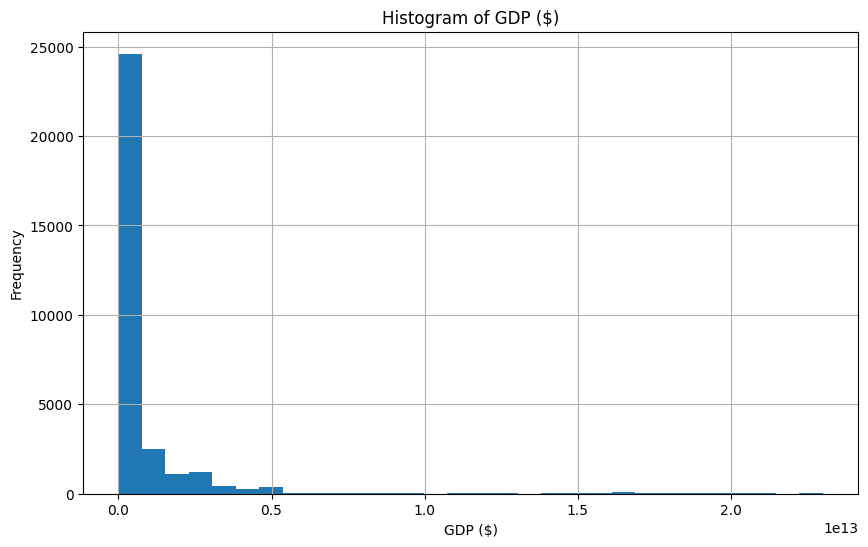

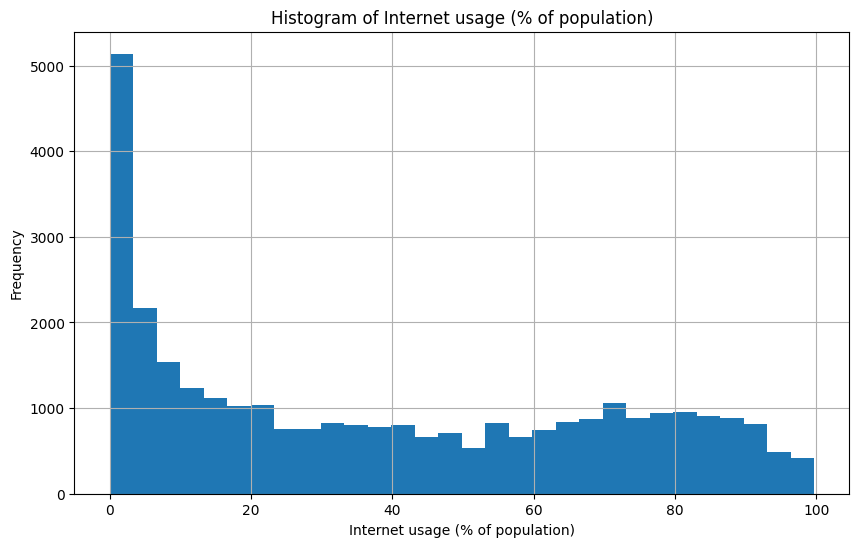

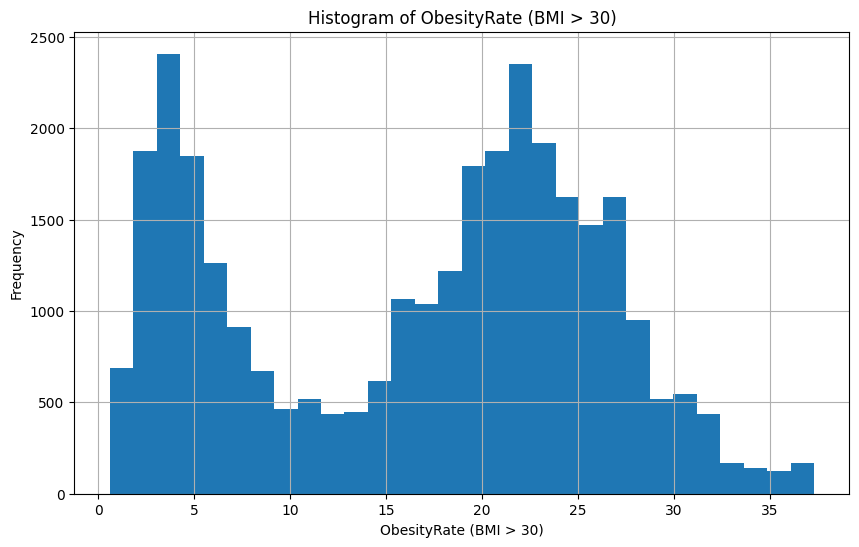

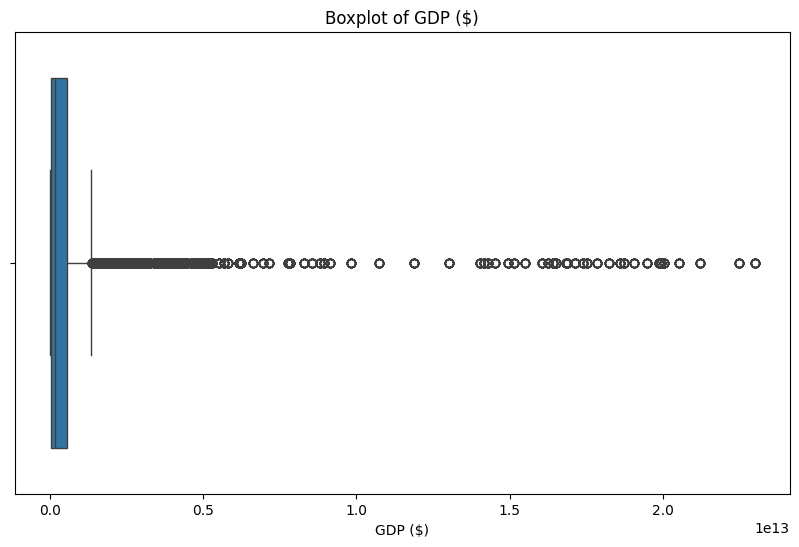

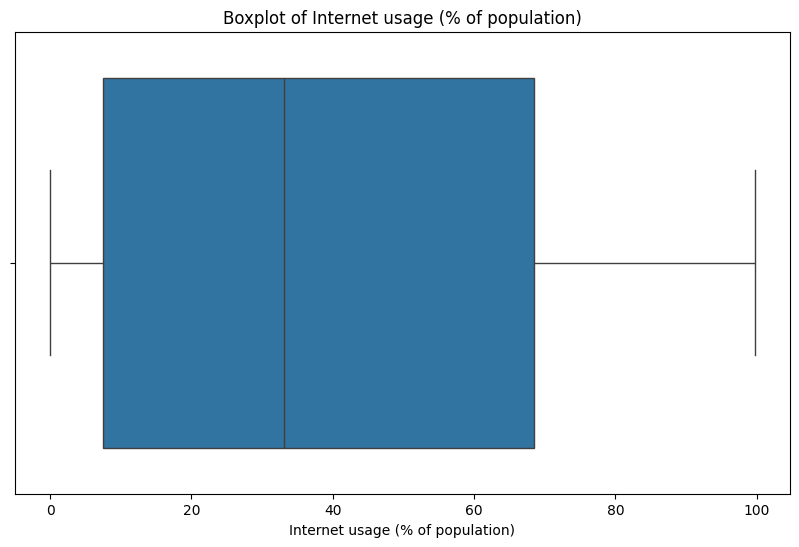

ValueError: could not convert string to float: 'Algeria'

<Figure size 1200x800 with 0 Axes>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the final merged dataset
final_df = pd.read_csv('final_merged_data.csv')

# Display basic descriptive statistics
print("Descriptive Statistics:")
print(final_df.describe())

# Histograms for selected columns
columns_to_visualize = ['GDP ($)', 'Internet usage (% of population)', 'ObesityRate (BMI > 30)']
for column in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    final_df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for potential outlier detection in specific columns
columns_for_outliers = ['GDP ($)', 'Internet usage (% of population)']
for column in columns_for_outliers:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=final_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Correlation matrix (optional)
plt.figure(figsize=(12, 8))
sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Feature Selection & Engineering (haris)

Korrelationen und welches sind wichtige features
binary encoding for categorial variables

In [33]:
# List of countries to be removed
countries_to_remove = [
    'United Arab Emirates', 'Cayman Islands', 'Suriname', 'Curacao', 'Turkmenistan',
    'South Sudan', 'Uzbekistan', 'Palestine', 'East Timor', 'Liberia', 'Vietnam', 'Nauru',
    'Serbia', 'American Samoa', 'Bahrain', 'Kosovo', 'Curacao', 'South Sudan', 'North Korea',
    'Liberia', 'South Sudan', 'Turks and Caicos Islands', 'Greenland', 'Channel Islands',
    'Montenegro', 'Djibouti', 'Somalia', 'Turks and Caicos Islands', 'Sint Maarten (Dutch part)',
    'Kosovo', 'Cayman Islands', 'Bahrain', 'Bhutan', 'Micronesia (country)', 'Nauru', 'Qatar',
    'South Sudan', 'Burundi', 'Sudan', 'Comoros', 'Democratic Republic of Congo', 'Libya',
    'Papua New Guinea', 'Seychelles', 'Syria', 'Montenegro', 'Serbia', 'South Sudan',
    'Montenegro', 'Zimbabwe'
]

# Remove rows with the specified countries
final_df = final_df[~final_df['Entity'].isin(countries_to_remove)]

final_df


Entity Code  Year     Sex  Age  Remaining Life Expectancy  \
0            Algeria  DZA  2000  Female    0                    71.9487   
1            Algeria  DZA  2001  Female    0                    72.1968   
2            Algeria  DZA  2002  Female    0                    72.5595   
3            Algeria  DZA  2003  Female    0                    72.2499   
4            Algeria  DZA  2004  Female    0                    72.8122   
...              ...  ...   ...     ...  ...                        ...   
31096  United States  USA  2016    Male   80                     8.7799   
31097  United States  USA  2017    Male   80                     8.7725   
31098  United States  USA  2018    Male   80                     8.8969   
31099  United States  USA  2019    Male   80                     9.0346   
31100  United States  USA  2020    Male   80                     8.2723   

       Gov expenditure on education (%)  Internet usage (% of population)  \
0                              4.982849                          0.491706   
1                              4.902120                          0.646114   
2                              4.821391                          1.591641   
3                              4.740663                          2.195360   
4                              4.659934                          4.634475   
...                                 ...                               ...   
31096                          4.806660                         85.544420   
31097                          5.122880                         87.274890   
31098                          4.928890                         88.498900   
31099                          4.987280                         89.430280   
31100                          5.435440                         90.900000   

       Access to electricity (% of population)  \
0                                     98.97310   
1                                     98.96687   
2                                     98.95306   
3                                     98.93401   
4                                     98.91208   
...                                        ...   
31096                                100.00000   
31097                                100.00000   
31098                                100.00000   
31099                                100.00000   
31100                                100.00000   

       Access to Sanitation (% of population)  \
0                                       58.85   
1                                       59.19   
2                                       59.53   
3                                       59.86   
4                                       60.18   
...                                       ...   
31096                                   97.19   
31097                                   97.16   
31098                                   97.14   
31099                                   97.11   
31100                                   97.09   

       Smoking Adults (% of population)       GDP ($)  \
0                             22.200000  2.703917e+11   
1                             22.120000  2.785034e+11   
2                             22.040000  2.940996e+11   
3                             21.960000  3.152748e+11   
4                             21.880000  3.288316e+11   
...                                 ...           ...   
31096                         24.666667  1.905248e+13   
31097                         24.033333  1.947962e+13   
31098                         23.400000  2.005337e+13   
31099                         23.400000  2.051348e+13   
31100                         23.000000  1.994571e+13   

       Meat consumptionm in kg per year per capita  ObesityRate (BMI > 30)  \
0                                        18.933718                    15.0   
1                                        17.341906                    15.5   
2                                        18.096855                    16.1   
3

In [37]:
#OneHotEncoding

# Ausgewählte Spalten für das binäre Encoding
#columns_to_encode = ['Sex', 'Entity']

# Erstelle ein neues DataFrame für das Training mit binärem Encoding
#training_dataset = pd.get_dummies(final_df, columns=columns_to_encode)

# Entferne die 'Code'-Spalte
#training_dataset = training_dataset.drop('Code', axis=1)

# Speichern des Ergebnisses
#training_dataset.to_csv('training_dataset.csv', index=False)


#training_dataset

Year  Age  Remaining Life Expectancy  Gov expenditure on education (%)  \
0      2000    0                    71.9487                          4.982849   
1      2001    0                    72.1968                          4.902120   
2      2002    0                    72.5595                          4.821391   
3      2003    0                    72.2499                          4.740663   
4      2004    0                    72.8122                          4.659934   
...     ...  ...                        ...                               ...   
31096  2016   80                     8.7799                          4.806660   
31097  2017   80                     8.7725                          5.122880   
31098  2018   80                     8.8969                          4.928890   
31099  2019   80                     9.0346                          4.987280   
31100  2020   80                     8.2723                          5.435440   

       Internet usage (% of population)  \
0                              0.491706   
1                              0.646114   
2                              1.591641   
3                              2.195360   
4                              4.634475   
...                                 ...   
31096                         85.544420   
31097                         87.274890   
31098                         88.498900   
31099                         89.430280   
31100                         90.900000   

       Access to electricity (% of population)  \
0                                     98.97310   
1                                     98.96687   
2                                     98.95306   
3                                     98.93401   
4                                     98.91208   
...                                        ...   
31096                                100.00000   
31097                                100.00000   
31098                                100.00000   
31099                                100.00000   
31100                                100.00000   

       Access to Sanitation (% of population)  \
0                                       58.85   
1                                       59.19   
2                                       59.53   
3                                       59.86   
4                                       60.18   
...                                       ...   
31096                                   97.19   
31097                                   97.16   
31098                                   97.14   
31099                                   97.11   
31100                                   97.09   

       Smoking Adults (% of population)       GDP ($)  \
0                             22.200000  2.703917e+11   
1                             22.120000  2.785034e+11   
2                             22.040000  2.940996e+11   
3                             21.960000  3.152748e+11   
4                             21.880000  3.288316e+11   
...                                 ...           ...   
31096                         24.666667  1.905248e+13   
31097                         24.033333  1.947962e+13   
31098                         23.400000  2.005337e+13   
31099                         23.400000  2.051348e+13   
31100                         23.000000  1.994571e+13   

       Meat consumptionm in kg per year per capita  ObesityRate (BMI > 30)  \
0                                        18.933718                    15.0   
1                                        17.341906                    15.5   
2                                        18.096855                    16.1   
3                                        19.324575                    16.7   
4                                        21.336285                    17.3   
...                                            ...                     ...   
31096                                   118.195300                    37.3   
31097             

In [40]:
import category_encoders as ce

# Selected columns for binary encoding
columns_to_encode = ['Sex', 'Entity']

# Create a new DataFrame for training with binary encoding
encoder = ce.BinaryEncoder(cols=columns_to_encode, drop_invariant=True)
training_dataset = encoder.fit_transform(final_df)

# Remove the 'Code' column
training_dataset = training_dataset.drop('Code', axis=1)

# Save the result
training_dataset.to_csv('training_dataset_binary.csv', index=False)

training_dataset


Entity_0  Entity_1  Entity_2  Entity_3  Entity_4  Entity_5  Entity_6  \
0             0         0         0         0         0         0         1   
1             0         0         0         0         0         0         1   
2             0         0         0         0         0         0         1   
3             0         0         0         0         0         0         1   
4             0         0         0         0         0         0         1   
...         ...       ...       ...       ...       ...       ...       ...   
31096         1         1         0         0         0         1         1   
31097         1         1         0         0         0         1         1   
31098         1         1         0         0         0         1         1   
31099         1         1         0         0         0         1         1   
31100         1         1         0         0         0         1         1   

       Year  Sex_0  Sex_1  Age  Remaining Life Expectancy  \
0      2000      0      1    0                    71.9487   
1      2001      0      1    0                    72.1968   
2      2002      0      1    0                    72.5595   
3      2003      0      1    0                    72.2499   
4      2004      0      1    0                    72.8122   
...     ...    ...    ...  ...                        ...   
31096  2016      1      0   80                     8.7799   
31097  2017      1      0   80                     8.7725   
31098  2018      1      0   80                     8.8969   
31099  2019      1      0   80                     9.0346   
31100  2020      1      0   80                     8.2723   

       Gov expenditure on education (%)  Internet usage (% of population)  \
0                              4.982849                          0.491706   
1                              4.902120                          0.646114   
2                              4.821391                          1.591641   
3                              4.740663                          2.195360   
4                              4.659934                          4.634475   
...                                 ...                               ...   
31096                          4.806660                         85.544420   
31097                          5.122880                         87.274890   
31098                          4.928890                         88.498900   
31099                          4.987280                         89.430280   
31100                          5.435440                         90.900000   

       Access to electricity (% of population)  \
0                                     98.97310   
1                                     98.96687   
2                                     98.95306   
3                                     98.93401   
4                                     98.91208   
...                                        ...   
31096                                100.00000   
31097                                100.00000   
31098                                100.00000   
31099                                100.00000   
31100                                100.00000   

       Access to Sanitation (% of population)  \
0                                       58.85   
1                                       59.19   
2                                       59.53   
3                                       59.86   
4                                       60.18   
...                                       ...   
31096                                   97.19   
31097                                   97.16   
31098                                   97.14   
31099                                   97.11   
31100                                   97.09   

       Smoking Adults (% of population)       GDP ($)  \
0                             22.200000  2.703917e+11   
1                             22.120000  2.785034e+11   
2                             22.040000

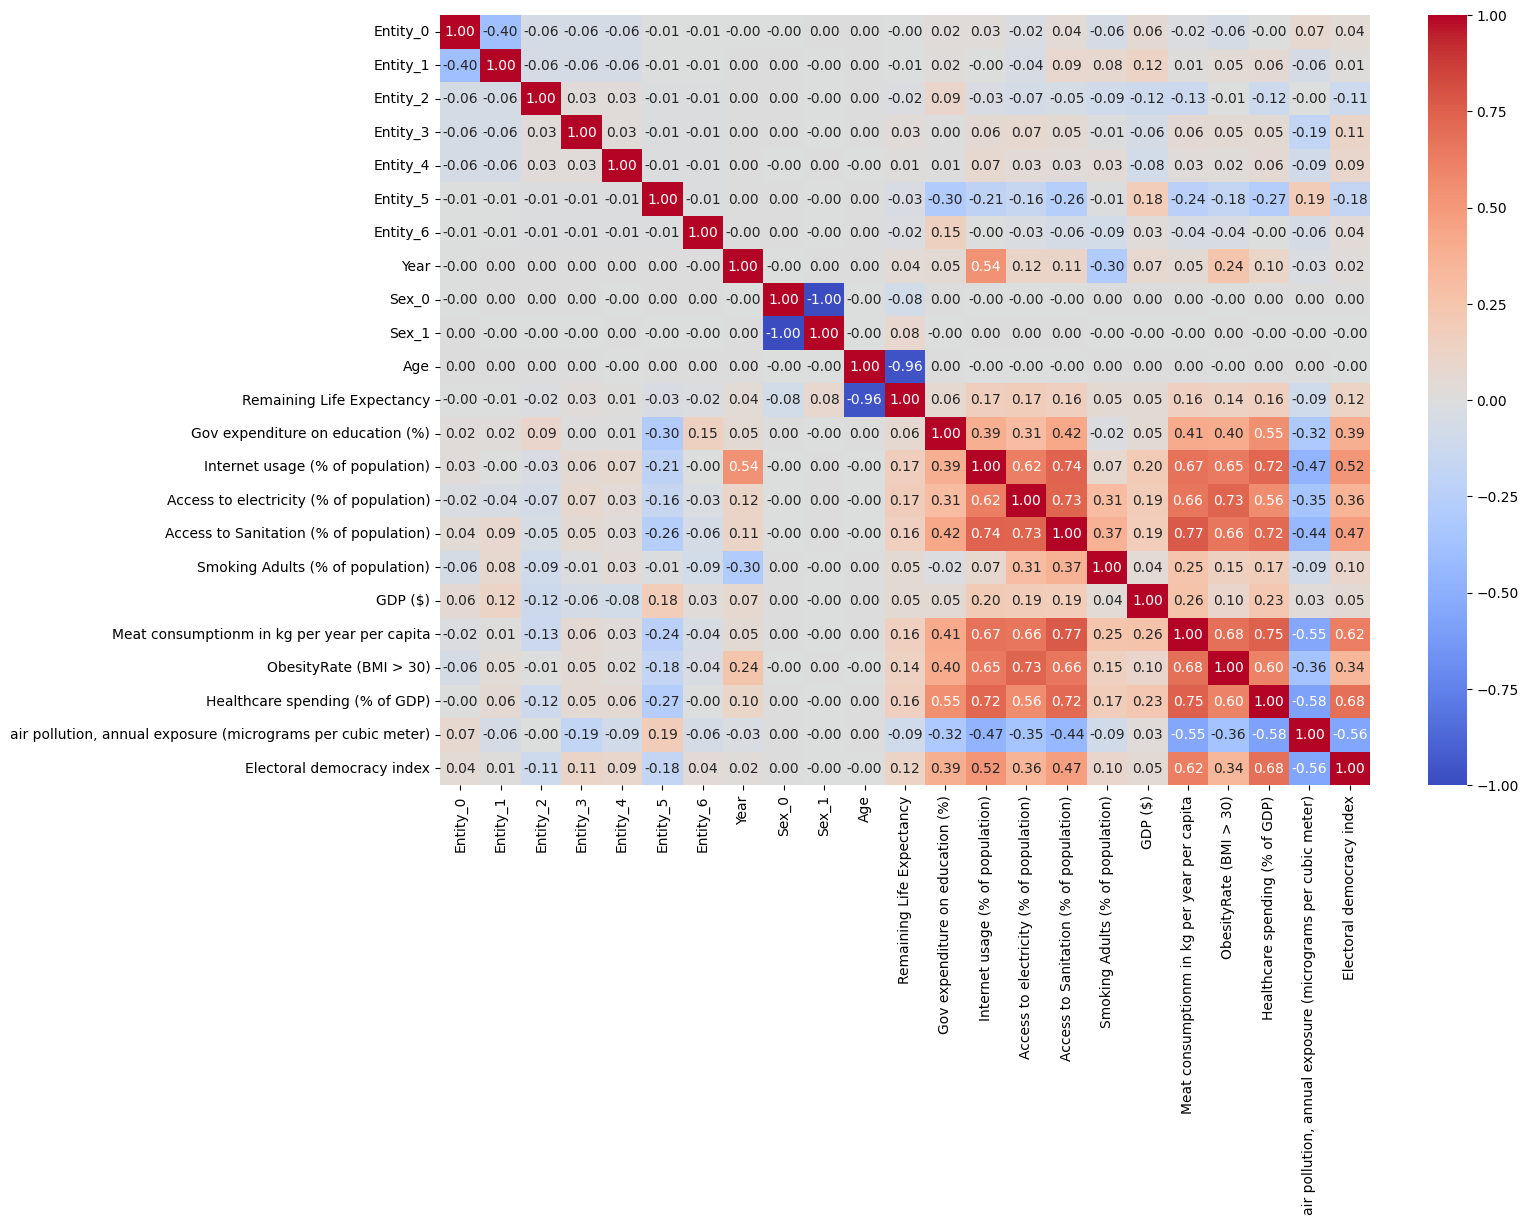

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'final_df'
correlation_matrix = training_dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()
#    0 to 0.2: Very weak correlation
#    0.2 to 0.4: Weak correlation
#    0.4 to 0.6: Moderate correlation
#    0.6 to 0.8: Strong correlation
#    0.8 to 1.0: Very strong correlation

## train models (alle)

## XAI (TBD)

## frontend (Sven)